# Big Ideas Final Product

In [30]:
#imports pandas and all graphing applications
import pandas as pd
%matplotlib inline
import geopandas
import matplotlib.pyplot as plt
import pylab

In [69]:
#import neighborhood map
neighborhoods = geopandas.read_file("Neighborhoods_.shp")

In [31]:
#imports each of the datasets
data = pd.read_csv("green_spaces.csv", index_col="Neighborhood", parse_dates=True)
court = pd.read_csv("Ccourts.csv", parse_dates=True)
trees = pd.read_csv("trees.csv", parse_dates=True)

In [32]:
#formatting the datasets
trees = trees["neighborhood"].value_counts().reset_index().rename({'index' : 'hood', 'neighborhood' : 'tree count'}, axis=1)
court = court['neighborhood'].value_counts().reset_index().rename({'index' : 'hood', 'neighborhood' : 'park count'}, axis=1)

# Metric 1: Amount of Trees

In [33]:
#My dataset
trees

,hood,tree count
0,Squirrel Hill South,2202
1,Squirrel Hill North,1499
2,South Side Flats,1355
3,Shadyside,1147
4,Bloomfield,1073
...,...,...
84,Arlington Heights,4
85,Northview Heights,4
86,Glen Hazel,2
87,Esplen,2


In [34]:
#Calculates the average amount of trees in each neighborhood.
treeMean = trees.mean()
print("The mean amount of trees is: ")
print(treeMean)

The mean amount of trees is: 
tree count    343.865169
dtype: float64


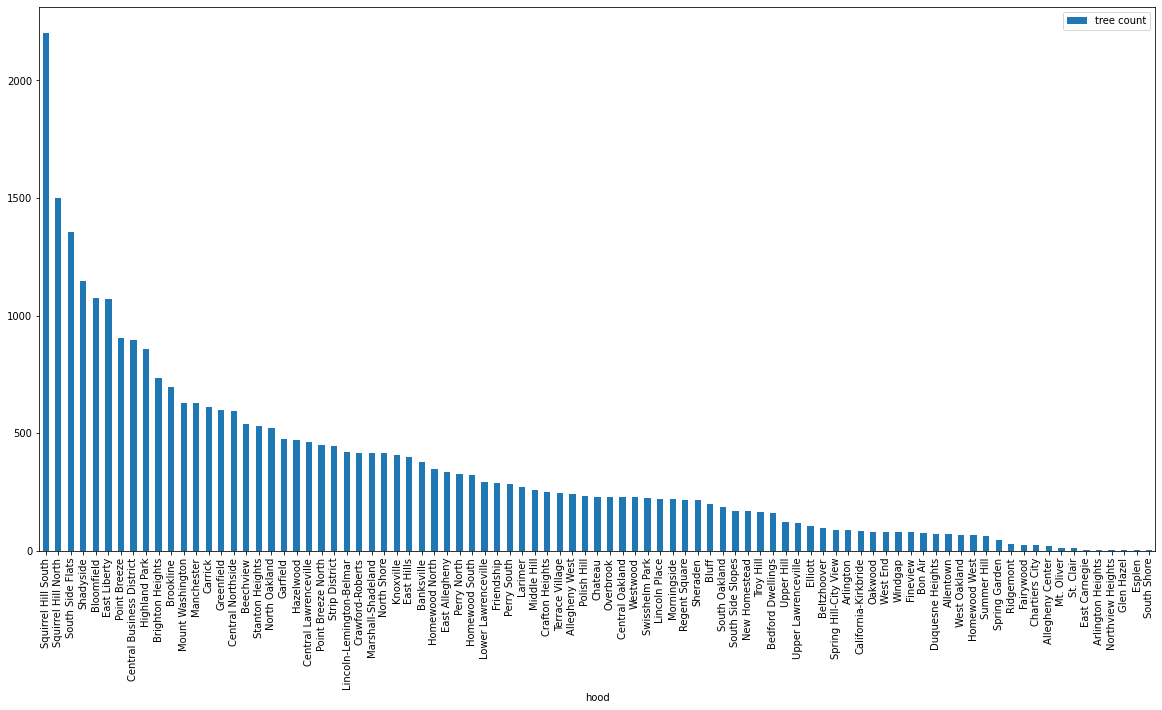

In [35]:
#Graphs the amount of trees
pylab.figure(figsize=(20, 10))
ax=pylab.gca()
trees.plot(kind='bar', x='hood', y='tree count', ax=ax)

In [71]:
#merges the trees dataset with my map
trees_map = neighborhoods.merge(trees, how='left', left_on='hood', right_on='hood')

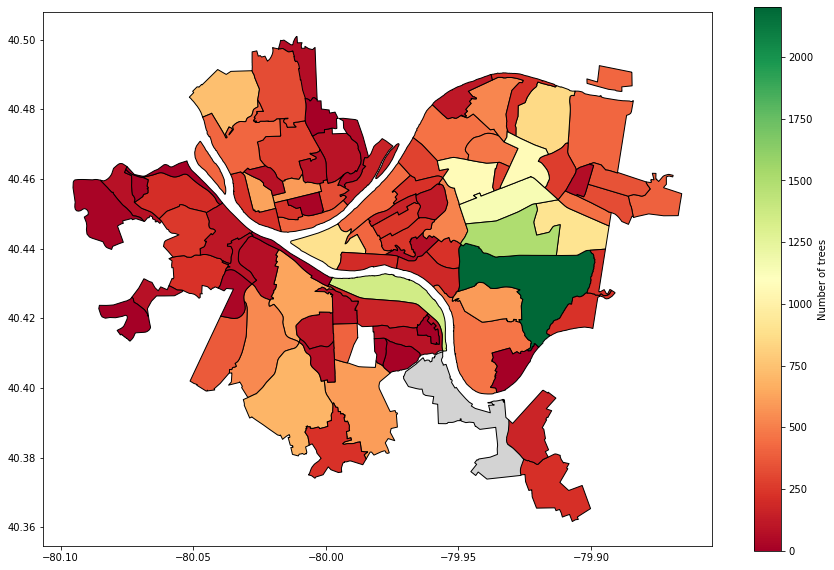

In [72]:
#creates the neighborhood plot with the merged data
trees_map.plot(column='tree count', # set the data to be used for coloring
               cmap='RdYlGn',              # choose a color palette
               edgecolor="black",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of trees"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"}, # set disctricts with no data to gray
               vmin=0)

# Metric 2: Amount of Courts

#Prints the dataset
court

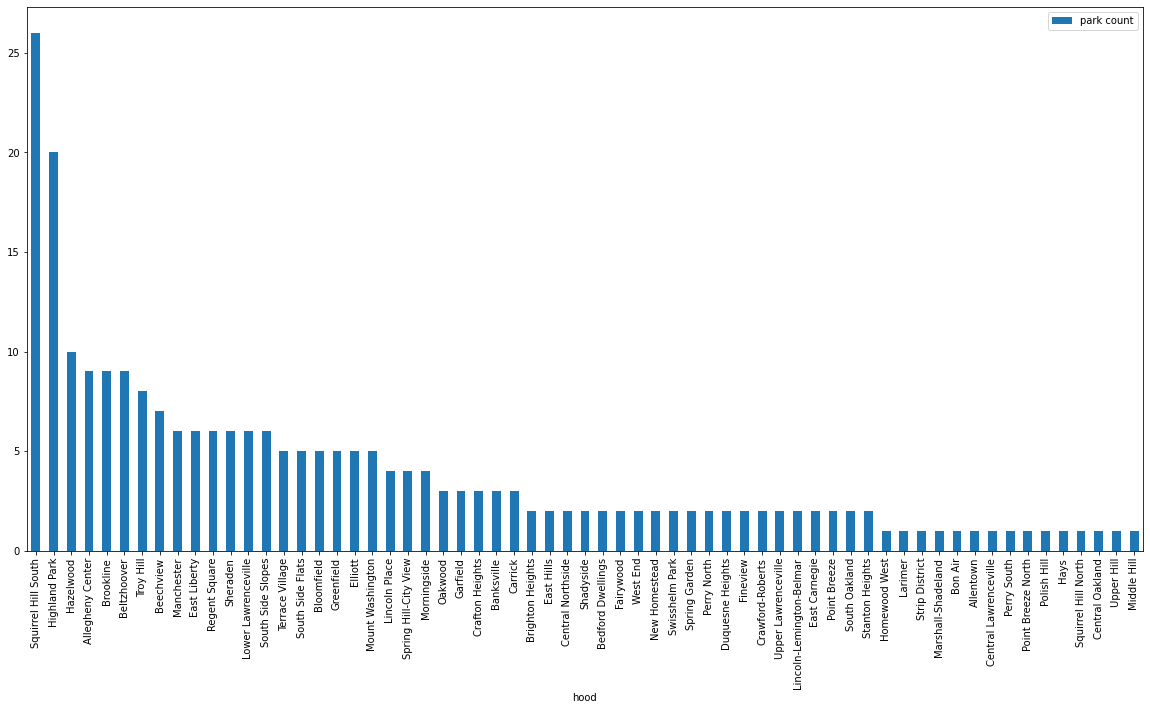

In [56]:
#Graphs the amount of courts and recreational spaces
pylab.figure(figsize=(20, 10))
ax=pylab.gca()
court.plot(kind='bar', x='hood', y='park count', ax=ax)

In [73]:
#merges data
court_map = neighborhoods.merge(court, how='left', left_on='hood', right_on='hood')

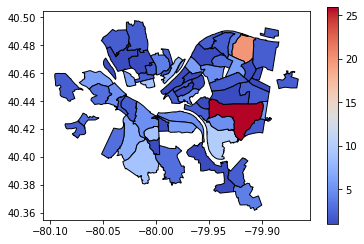

In [75]:
#maps neighborhoods based on courts
court_map.plot(column='park count',
                cmap='coolwarm', # choose a color palette
                edgecolor='black',
               legend=True
              )

# Metric 3: Amount of Greenspaces

In [57]:
#Prints the dataset
data.head(10)

,Neighborhood,Responsibility_Parks or Operations,Facility,Division,Total Acreage,Maintainable Acreage,Shelter,Rec Center,Senior Center,Pool,...,Grandstand,Control Link for Basketball Courts,Control Link for Tennis Court,Control Linkl for Hockey Court,Dek Hockey Court,Dog Park,Spray Park,Ownership of Facility,Benches,Tables
0,South Oakland,Operations,Bates St Triangle,3.0,0.20,NaN,NaN,NaN,NaN,NaN,...,NaN,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN
1,East Liberty,Operations,Baum Negley Triangle,2.0,0.20,NaN,NaN,0.0,0.0,NaN,...,NaN,No,No,No,NaN,NaN,NaN,NaN,0.0,0.0
2,Crawford Roberts,Operations,Bedford Strip,3.0,0.30,NaN,NaN,0.0,0.0,NaN,...,NaN,No,No,No,NaN,NaN,NaN,NaN,0.0,0.0
3,Beechview,Operations,Beechview Monument,5.0,0.10,NaN,NaN,NaN,NaN,NaN,...,NaN,No,No,No,NaN,NaN,NaN,NaN,2.0,NaN
4,Brookline,Operations,Brookline Monument,4.0,0.10,NaN,NaN,0.0,0.0,NaN,...,NaN,No,No,No,NaN,NaN,NaN,NaN,0.0,0.0
5,South Oakland,Operations,Craft Triangle,3.0,0.10,NaN,NaN,NaN,NaN,NaN,...,NaN,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN
6,Central Business District,Operations,Crosstown,6.0,1.20,NaN,NaN,NaN,NaN,NaN,...,NaN,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN
7,East Liberty,Operations,East Liberty Strip,2.0,2.00,NaN,NaN,NaN,NaN,NaN,...,NaN,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN
8,Point Breeze,Operations,Edgerton Circle,3.0,0.01,NaN,NaN,0.0,0.0,NaN,...,NaN,No,No,No,NaN,NaN,NaN,NaN,0.0,0.0
9,NaN,Operations,Fort Duquesne Blvd Strip,6.0,NaN,NaN,NaN,0.0,0.0,NaN,...,NaN,No,No,No,NaN,NaN,NaN,NaN,0.0,0.0


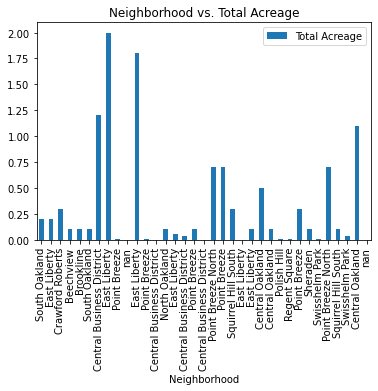

In [58]:
#This graph shows each neighborhood greenspace based on acreage
data = data.reset_index()
data.plot(kind='bar', x='Neighborhood', y='Total Acreage',
        title="Neighborhood vs. Total Acreage")

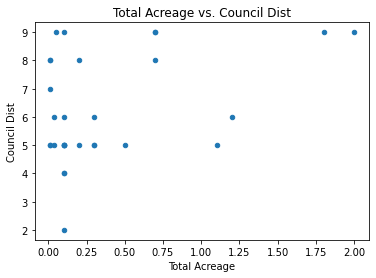

In [60]:
#I think this is important to look at becasue we should be comparing what neighborhood has the higest population along
#with what Neighborbood has the highest total acreage.
data.plot(kind='scatter', x='Total Acreage', y='Council Dist', title="Total Acreage vs. Council Dist")

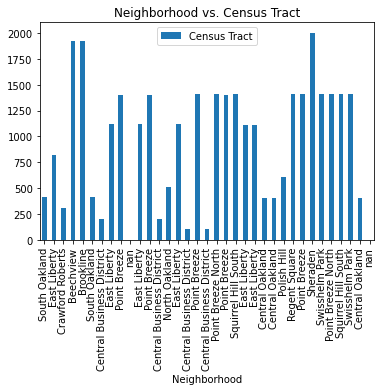

In [61]:
#with this graph I'm comparing the amount Total Acreage with the amount of members in a Council District.
#We can notice a pattern where if the total Acreage is higher their is a higher amount of district memebers.
data.plot(kind='bar', x='Neighborhood', y='Census Tract',
        title="Neighborhood vs. Census Tract")

In [62]:
#This graph shows all the metrics that I have measured over my dataset
census_data = data[['Census Tract', 'Council Dist', 'Total Acreage']].dropna()
census_data

,Census Tract,Council Dist,Total Acreage
0,409.0,5.0,0.20
1,818.0,8.0,0.20
2,305.0,6.0,0.30
3,1920.0,4.0,0.10
4,1918.0,4.0,0.10
5,409.0,5.0,0.10
6,201.0,6.0,1.20
7,1115.0,9.0,2.00
8,1404.0,8.0,0.01
10,1115.0,9.0,1.80


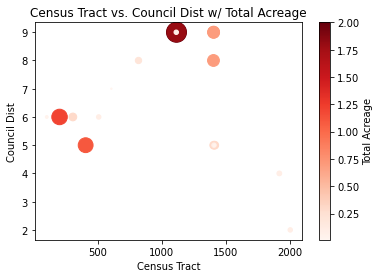

In [54]:
#Final graph comparing everything 
pylab.figure()
ax = pylab.gca() #arjun said I could use this, and to just let the grader know.
census_data.plot(kind='scatter', x='Census Tract', y='Council Dist', 
        c='Total Acreage', 
        s=census_data['Total Acreage'] * 200, 
        title="Census Tract vs. Council Dist w/ Total Acreage",
        cmap='Reds', ax=ax)

# Combining our Datasets for a Final Metric

In [64]:
#Grading neighborhoods based on amount of trees
def treeScore(tree_count):
    if tree_count > 1200:
        return 15
    elif tree_count > 600:
        return 10
    elif tree_count > 400:
        return 5 
    else:
        return 0
    
trees['tree score'] = trees['tree count'].apply(treeScore)
trees

,hood,tree count,tree score
0,Squirrel Hill South,2202,15
1,Squirrel Hill North,1499,15
2,South Side Flats,1355,15
3,Shadyside,1147,10
4,Bloomfield,1073,10
...,...,...,...
84,Arlington Heights,4,0
85,Northview Heights,4,0
86,Glen Hazel,2,0
87,Esplen,2,0


In [65]:
#Grading neighborhoods based on amount of courts
def courtScore(park_count):
    if park_count > 10:
        return 10
    elif park_count > 5:
        return 5
    else:
        return 0
    
court['court score'] = court['park count'].apply(courtScore)
court

,hood,park count,court score
0,Squirrel Hill South,26,10
1,Highland Park,20,10
2,Hazelwood,10,5
3,Allegheny Center,9,5
4,Brookline,9,5
...,...,...,...
58,Hays,1,0
59,Squirrel Hill North,1,0
60,Central Oakland,1,0
61,Upper Hill,1,0


In [66]:
#Grading neighborhoods based on amount of greenspaces
def greenspaceScore(total_acreage):
    if total_acreage > .75:
        return 15
    elif total_acreage > .1:
        return 10
    elif total_acreage > 0:
        return 5
    else:
        return 0
    
data['greenspace score'] = data['Total Acreage'].apply(greenspaceScore)
data = data.sort_values('greenspace score', ascending=False).reset_index()
greenspace_df = data[['Neighborhood', 'greenspace score']]
greenspace_df

,Neighborhood,greenspace score
0,Central Oakland,15
1,Central Business District,15
2,East Liberty,15
3,East Liberty,15
4,Point Breeze,10
5,East Liberty,10
6,Squirrel Hill South,10
7,Point Breeze North,10
8,Central Oakland,10
9,South Oakland,10


In [7]:
#Finds the best greenspace in each neighborhood
greenspace_df = greenspace_df.groupby('Neighborhood').max().reset_index()
greenspace_df

,Neighborhood,greenspace score
0,Beechview,5
1,Brookline,5
2,Central Business District,15
3,Central Oakland,15
4,Crawford Roberts,10
5,East Liberty,15
6,North Oakland,5
7,Point Breeze,10
8,Point Breeze North,10
9,Polish Hill,5


In [67]:
#Renames column
greenspace_df = greenspace_df.rename({'Neighborhood' : 'hood'}, axis=1)
greenspace_df

,hood,greenspace score
0,Central Oakland,15
1,Central Business District,15
2,East Liberty,15
3,East Liberty,15
4,Point Breeze,10
5,East Liberty,10
6,Squirrel Hill South,10
7,Point Breeze North,10
8,Central Oakland,10
9,South Oakland,10


In [9]:
#Renames the column
court = court[['hood', 'court score']]
court

,hood,court score
0,Squirrel Hill South,10
1,Highland Park,10
2,Hazelwood,5
3,Allegheny Center,5
4,Brookline,5
...,...,...
58,Hays,0
59,Squirrel Hill North,0
60,Central Oakland,0
61,Upper Hill,0


In [10]:
#Renames the column
trees = trees.drop('tree count', axis=1)
trees

,hood,tree score
0,Squirrel Hill South,15
1,Squirrel Hill North,15
2,South Side Flats,15
3,Shadyside,10
4,Bloomfield,10
...,...,...
84,Arlington Heights,0
85,Northview Heights,0
86,Glen Hazel,0
87,Esplen,0


In [11]:
#Merges all of our datasets together
final_df = trees.merge(court, how='outer').merge(greenspace_df, how='outer')
final_df

,hood,tree score,court score,greenspace score
0,Squirrel Hill South,15.0,10.0,10.0
1,Squirrel Hill North,15.0,0.0,NaN
2,South Side Flats,15.0,0.0,NaN
3,Shadyside,10.0,0.0,NaN
4,Bloomfield,10.0,0.0,NaN
...,...,...,...,...
86,Glen Hazel,0.0,NaN,NaN
87,Esplen,0.0,NaN,NaN
88,South Shore,0.0,NaN,NaN
89,Hays,NaN,0.0,NaN


In [12]:
#Makes values that are NaN so the map can process them
final_df = final_df.fillna(0)
final_df['final score'] = final_df['tree score'] + final_df['court score'] + final_df['greenspace score']
final_df

,hood,tree score,court score,greenspace score,final score
0,Squirrel Hill South,15.0,10.0,10.0,35.0
1,Squirrel Hill North,15.0,0.0,0.0,15.0
2,South Side Flats,15.0,0.0,0.0,15.0
3,Shadyside,10.0,0.0,0.0,10.0
4,Bloomfield,10.0,0.0,0.0,10.0
...,...,...,...,...,...
86,Glen Hazel,0.0,0.0,0.0,0.0
87,Esplen,0.0,0.0,0.0,0.0
88,South Shore,0.0,0.0,0.0,0.0
89,Hays,0.0,0.0,0.0,0.0


In [14]:
#Merge data with map
final_map = neighborhoods.merge(final_df, how='left', left_on='hood', right_on='hood')
final_map.head()

,objectid,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,created_da,last_edite,last_edi_1,Shape__Are,Shape__Len,geometry,tree score,court score,greenspace score,final score
0,1,0.0,42,003,040500,1,420030405001,Block Group 1,G5030,S,...,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,7.842997e+06,11525.904546,"POLYGON ((-79.95304 40.44203, -79.95302 40.442...",0.0,0.0,15.0,15.0
1,2,1.0,42,003,040400,1,420030404001,Block Group 1,G5030,S,...,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.390469e+07,20945.562570,"POLYGON ((-79.95455 40.45882, -79.95427 40.458...",5.0,0.0,5.0,10.0
2,3,2.0,42,003,040200,2,420030402002,Block Group 2,G5030,S,...,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,5.998649e+06,18280.484515,"POLYGON ((-79.96230 40.44294, -79.96220 40.442...",0.0,0.0,0.0,0.0
3,4,3.0,42,003,030500,2,420030305002,Block Group 2,G5030,S,...,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,7.203337e+06,15697.914337,"POLYGON ((-79.98275 40.44641, -79.98273 40.446...",5.0,0.0,0.0,5.0
4,5,5.0,42,003,020300,1,420030203001,Block Group 1,G5030,S,...,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.694875e+07,24019.532672,"POLYGON ((-79.97494 40.45629, -79.97484 40.456...",5.0,0.0,0.0,5.0


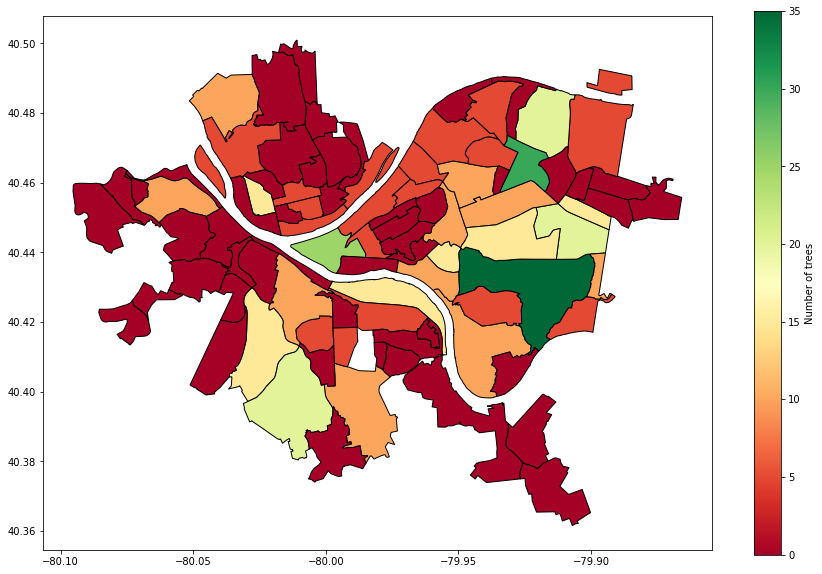

In [16]:
#Plots the final map
final_map.plot(column='final score', # set the data to be used for coloring
               cmap='RdYlGn',              # choose a color palette
               edgecolor="black",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of trees"}, # label the legend
               figsize=(15, 10),         # set the size
               )

# Conclusion

Our data measured the metrics of the amount of trees, the amount of courts, and the acreage of greenspaces in all of the neighborhoods in Pittsburgh. From our data, we have found that the best neighborhoods in Pittsburgh are Squirrel Hill South, East Liberty, and Downtown. The majority of neighborhoods in Pittsburgh do not contain many parks and recrational facilites, however, a few neighborhoods stand out which is shown in the graph above